In [ ]:
# importing smaller telugu dataset to test the model's config

In [1]:
!ls

'=3.3.2'    configs	     lightning_logs.zip   startup_script.sh	 temp
 NeMo	    documents	     notebooks		  te_manifest.json
 asr_venv   lightning_logs   resources		  te_manifest_val.json


In [20]:
import pandas as pd

In [21]:
# creating the complete manifest

te_white_noise = pd.read_csv("resources/te_white_noise/te_white_noise_manifest.csv")
te_background_noise = pd.read_csv("resources/te_background_noise/te_background_noise_manifest.csv")
te_fleurs = pd.read_csv('resources/te_fleurs/train.csv')
te_fleurs_pitch_shifted = pd.read_csv('resources/te_fleurs/pitch_shifted/te_fleurs_pitch_shifted_manifest.csv')
te_pitch_shifted = pd.read_csv('resources/te_pitch_shifted/te_pitch_shifted_manifest.csv')


In [22]:
te_white_noise.head()

,audio_filepath,duration,text,new_audio_filepath
0,resources/newsonair_v5/telugu/NSD-Telugu-Telug...,6.74,పద్దెనిమిది నుంచి నలభై ఐదు ఏళ్ల మధ్య వారు యాప...,resources/te_white_noise/NSD-Telugu-Telugu-070...
1,resources/newsonair_v5/telugu/NSD-Telugu-Telug...,8.58,రక్షణ శాఖ కార్యదర్శి స్వాగతోపన్యాసంతో ప్రారంభమ...,resources/te_white_noise/NSD-Telugu-Telugu-123...
2,resources/newsonair_v5/telugu/Regional-Vijayaw...,4.08,పార్లమెంటు రెండో విడత బడ్జెట్ సమావేశాలు ఈరోజు ...,resources/te_white_noise/Regional-Vijayawada-T...
3,resources/newsonair_v5/telugu/Regional-Hyderab...,9.24,పాఠశాల విద్యా నాణ్యత ప్రమాణాలను పెంచేందుకు అంక...,resources/te_white_noise/Regional-Hyderabad-Te...
4,resources/newsonair_v5/telugu/Regional-Hyderab...,9.20,ఈరోజు ప్రపంచ వన్యప్రాణి పరిరక్షణ దినోత్సవం సంద...,resources/te_white_noise/Regional-Hyderabad-Te...


In [65]:
# drop audio_filepath and rename new_audio_filepath to audio_filepath

te_white_noise.drop(columns=['audio_filepath'], inplace=True)
te_white_noise.rename(columns={'new_audio_filepath': 'audio_filepath'}, inplace=True)
te_white_noise.head()

,duration,text,audio_filepath
0,6.74,పద్దెనిమిది నుంచి నలభై ఐదు ఏళ్ల మధ్య వారు యాప...,resources/te_white_noise/NSD-Telugu-Telugu-070...
1,8.58,రక్షణ శాఖ కార్యదర్శి స్వాగతోపన్యాసంతో ప్రారంభమ...,resources/te_white_noise/NSD-Telugu-Telugu-123...
2,4.08,పార్లమెంటు రెండో విడత బడ్జెట్ సమావేశాలు ఈరోజు ...,resources/te_white_noise/Regional-Vijayawada-T...
3,9.24,పాఠశాల విద్యా నాణ్యత ప్రమాణాలను పెంచేందుకు అంక...,resources/te_white_noise/Regional-Hyderabad-Te...
4,9.20,ఈరోజు ప్రపంచ వన్యప్రాణి పరిరక్షణ దినోత్సవం సంద...,resources/te_white_noise/Regional-Hyderabad-Te...


In [18]:
te_background_noise.drop(columns=['audio_filepath'], inplace=True)
te_background_noise.rename(columns={'new_audio_filepath': 'audio_filepath'}, inplace=True)
te_background_noise.head()

NameError: name 'te_background_noise' is not defined

In [67]:
te_fleurs.rename(columns={'transcriptions': 'text'}, inplace=True)

In [68]:
te_fleurs.head()

,audio_filepath,text,sample_rate,duration
0,resources/te_fleurs/train/16751597673116166984...,"చల్లని వాతావరణాల్లో శ్వాస సంబంధిత సమస్యలు వలె,...",253440,15.84
1,resources/te_fleurs/train/13086014754082864911...,వాటికన్ సిటీ పౌరులు అందరూ రోమన్ కాథలిక్‌లు.,101760,6.36
2,resources/te_fleurs/train/14464725489867066022...,ఇంతకు ముందు ఎన్నడూ చూడని విధంగా మెదడు నిర్మాణ...,190080,11.88
3,resources/te_fleurs/train/1057018260503788192.wav,"ఒక విషయం ఏమిటంటే, ఉత్తర న్యూ మెక్సికోలో తాగి డ...",255360,15.96
4,resources/te_fleurs/train/15519568632941226638...,అలోన్సో ముందున్న కార్లు సేఫ్టీ కారు కింద ఇంధనం...,214080,13.38


In [69]:
te_fleurs_pitch_shifted.head()

,audio_filepath,transcriptions,sample_rate,duration,new_audio_filepath
0,resources/te_fleurs/train/17868828176923608423...,అవి గదులలాగా ఉన్నాయి. అతను చనిపోయిన కణాలను గుర...,120960,7.56,resources/te_fleurs/pitch_shifted/178688281769...
1,resources/te_fleurs/train/14245662570721842048...,ఆస్ట్రేలియా మాజీ సంప్రదాయవాద ప్రభుత్వం క్యోటోన...,295680,18.48,resources/te_fleurs/pitch_shifted/142456625707...
2,resources/te_fleurs/train/13354602618233886868...,"పెద్ద గాయాలు ఏవీ నమోదు కాలేదు, కానీ పేలుడు సమయ...",167040,10.44,resources/te_fleurs/pitch_shifted/133546026182...
3,resources/te_fleurs/train/9471343398098868152.wav,World War I మరియు World War IIలో సబ్‌మెరైన్‌లన...,318720,19.92,resources/te_fleurs/pitch_shifted/947134339809...
4,resources/te_fleurs/train/2002088035136879191.wav,మధ్య దూర పరుగు అనేది సాపేక్షంగా చవకైన క్రీడ; అ...,202560,12.66,resources/te_fleurs/pitch_shifted/200208803513...


In [70]:
te_fleurs_pitch_shifted.drop(columns=['audio_filepath'], inplace=True)
te_fleurs_pitch_shifted.rename(columns={'new_audio_filepath': 'audio_filepath'}, inplace=True)
te_fleurs_pitch_shifted.rename(columns={'transcriptions': 'text'}, inplace=True)
te_fleurs_pitch_shifted.head()

,text,sample_rate,duration,audio_filepath
0,అవి గదులలాగా ఉన్నాయి. అతను చనిపోయిన కణాలను గుర...,120960,7.56,resources/te_fleurs/pitch_shifted/178688281769...
1,ఆస్ట్రేలియా మాజీ సంప్రదాయవాద ప్రభుత్వం క్యోటోన...,295680,18.48,resources/te_fleurs/pitch_shifted/142456625707...
2,"పెద్ద గాయాలు ఏవీ నమోదు కాలేదు, కానీ పేలుడు సమయ...",167040,10.44,resources/te_fleurs/pitch_shifted/133546026182...
3,World War I మరియు World War IIలో సబ్‌మెరైన్‌లన...,318720,19.92,resources/te_fleurs/pitch_shifted/947134339809...
4,మధ్య దూర పరుగు అనేది సాపేక్షంగా చవకైన క్రీడ; అ...,202560,12.66,resources/te_fleurs/pitch_shifted/200208803513...


In [71]:
te_pitch_shifted.drop(columns=['audio_filepath'], inplace=True)
te_pitch_shifted.rename(columns={'new_audio_filepath': 'audio_filepath'}, inplace=True)
te_pitch_shifted.head()

,duration,text,audio_filepath
0,5.10,ప్రతి మూడు నుంచి అయిదు నిమిషాల వ్యవధిలో ఒక రైల...,resources/te_pitch_shifted/Regional-Hyderabad-...
1,7.98,కరోనా కష్ట సమయాల్లో బాల్ పురస్కార్ అవార్డులు ప...,resources/te_pitch_shifted/NSD-Telugu-Telugu-1...
2,14.32,ఒప్పంద వివరాలను ప్రధానంగా ప్రస్తావిస్తూ ఉభయ పక...,resources/te_pitch_shifted/NSD-Telugu-Telugu-1...
3,4.68,గ్రేట్ ఇండియన్ పెనిన్సులర్ రైల్వేలో దాదాపు నాల...,resources/te_pitch_shifted/Regional-Vijayawada...
4,1.72,వినయ్ చంద్ అధికారులను ఆదేశించారు,resources/te_pitch_shifted/Regional-Vijayawada...


In [72]:
te_openslr = pd.read_csv('resources/tel_openslr/openslr_manifest.csv')

te_openslr.head()

,file_name,transcriptions,duration
0,resources/tel_openslr/tef_01033_00351357063.wav,ఈ వివాదం సెప్టెంబర్ రెండు వేల తొమ్మిదిన పరిష్క...,4.693333
1,resources/tel_openslr/tef_02828_01625402654.wav,ఒక బ్యాంకు ఒక ప్రాథమిక పాఠశాల ఉన్నాయి,4.181333
2,resources/tel_openslr/tef_08318_01333265498.wav,చాలా గొంగళి పురుగులు షాకాహారులే,3.072000
3,resources/tel_openslr/tef_04830_00246502215.wav,ప్రిన్సిపాల్ ఒక మొమెంటోతో ప్రవేశించారు,3.328000
4,resources/tel_openslr/tef_09281_02034334714.wav,ట్రూమాన్ లైబ్రరీ అండ్ మ్యూజియం,3.669333


In [74]:
te_openslr.rename(columns={'transcriptions': 'text'}, inplace=True)
te_openslr.head()

,file_name,text,duration
0,resources/tel_openslr/tef_01033_00351357063.wav,ఈ వివాదం సెప్టెంబర్ రెండు వేల తొమ్మిదిన పరిష్క...,4.693333
1,resources/tel_openslr/tef_02828_01625402654.wav,ఒక బ్యాంకు ఒక ప్రాథమిక పాఠశాల ఉన్నాయి,4.181333
2,resources/tel_openslr/tef_08318_01333265498.wav,చాలా గొంగళి పురుగులు షాకాహారులే,3.072000
3,resources/tel_openslr/tef_04830_00246502215.wav,ప్రిన్సిపాల్ ఒక మొమెంటోతో ప్రవేశించారు,3.328000
4,resources/tel_openslr/tef_09281_02034334714.wav,ట్రూమాన్ లైబ్రరీ అండ్ మ్యూజియం,3.669333


In [75]:
te_openslr.rename(columns={'file_name': 'audio_filepath'}, inplace=True)
te_openslr.head()

,audio_filepath,text,duration
0,resources/tel_openslr/tef_01033_00351357063.wav,ఈ వివాదం సెప్టెంబర్ రెండు వేల తొమ్మిదిన పరిష్క...,4.693333
1,resources/tel_openslr/tef_02828_01625402654.wav,ఒక బ్యాంకు ఒక ప్రాథమిక పాఠశాల ఉన్నాయి,4.181333
2,resources/tel_openslr/tef_08318_01333265498.wav,చాలా గొంగళి పురుగులు షాకాహారులే,3.072000
3,resources/tel_openslr/tef_04830_00246502215.wav,ప్రిన్సిపాల్ ఒక మొమెంటోతో ప్రవేశించారు,3.328000
4,resources/tel_openslr/tef_09281_02034334714.wav,ట్రూమాన్ లైబ్రరీ అండ్ మ్యూజియం,3.669333


In [23]:
te_ai4bharat = pd.read_csv('resources/newsonair_v5/telugu/train.csv')
te_ai4bharat.head()

,file_name,sample_rate,transcriptions,duration
0,resources/newsonair_v5/telugu/Regional-Vijayaw...,6400,కాగా,0.40
1,resources/newsonair_v5/telugu/Regional-Vijayaw...,21440,ఆంధ్రప్రదేశ్ లో ప్రైవేటు,1.34
2,resources/newsonair_v5/telugu/Regional-Vijayaw...,145280,ప్రధాన మంత్రి నరేంద్ర మోదీ తన మనసులోని భావాలను...,9.08
3,resources/newsonair_v5/telugu/Regional-Vijayaw...,24960,గండి పడిన చెరువులను పరిశీలించి,1.56
4,resources/newsonair_v5/telugu/Regional-Vijayaw...,6720,కాగా,0.42


In [77]:
te_ai4bharat.rename(columns={'file_name': 'audio_filepath'}, inplace=True)
te_ai4bharat.rename(columns={'transcriptions': 'text'}, inplace=True)
te_ai4bharat.head()

,audio_filepath,sample_rate,text,duration
0,resources/newsonair_v5/telugu/Regional-Vijayaw...,6400,కాగా,0.40
1,resources/newsonair_v5/telugu/Regional-Vijayaw...,21440,ఆంధ్రప్రదేశ్ లో ప్రైవేటు,1.34
2,resources/newsonair_v5/telugu/Regional-Vijayaw...,145280,ప్రధాన మంత్రి నరేంద్ర మోదీ తన మనసులోని భావాలను...,9.08
3,resources/newsonair_v5/telugu/Regional-Vijayaw...,24960,గండి పడిన చెరువులను పరిశీలించి,1.56
4,resources/newsonair_v5/telugu/Regional-Vijayaw...,6720,కాగా,0.42


In [17]:
!rm -rf resources/final_te_manifests/manifest.json

In [52]:
import pandas as pd

In [60]:
te_indic_tts_female = pd.read_csv('resources/IndicTTS_telugu/indic_tts_manifest.csv')
te_indic_tts_female.head()

,audio_filepath,text,duration
0,resources/IndicTTS_telugu/mono/wav_16kHz/train...,నరకవాసి.,2.162000
1,resources/IndicTTS_telugu/mono/wav_16kHz/train...,బ్రహ్మదత్తుడు కాశీరాజ్యాన్ని పరిపాలించే కాలంలో...,37.200938
2,resources/IndicTTS_telugu/mono/wav_16kHz/train...,ఇంతలో కార్తీక పౌర్ణమి వచ్చింది మిత్రవిందకుడితో...,24.998875
3,resources/IndicTTS_telugu/mono/wav_16kHz/train...,డబ్బుకోసమని మిత్రవిందకుడు సరేనన్నాడు అతను ఉపదే...,34.751250
4,resources/IndicTTS_telugu/mono/wav_16kHz/train...,ఆయనను ఇక్కడికి తీసుకురావటం దేనికమ్మా నా కాయనతో...,8.268875


In [54]:
indic_tts_pitch_shifted = pd.read_csv('resources/te_indic_tts_pitch_shifted/te_indic_tts_pitch_shifted_manifest.csv')
indic_tts_pitch_shifted.head()

,audio_filepath,text,duration,new_audio_filepath
0,resources/IndicTTS_telugu/mono/wav_16kHz/train...,నరకవాసి.,2.162000,resources/te_indic_tts_pitch_shifted/train_tel...
1,resources/IndicTTS_telugu/mono/wav_16kHz/train...,బ్రహ్మదత్తుడు కాశీరాజ్యాన్ని పరిపాలించే కాలంలో...,37.200938,resources/te_indic_tts_pitch_shifted/train_tel...
2,resources/IndicTTS_telugu/mono/wav_16kHz/train...,ఇంతలో కార్తీక పౌర్ణమి వచ్చింది మిత్రవిందకుడితో...,24.998875,resources/te_indic_tts_pitch_shifted/train_tel...
3,resources/IndicTTS_telugu/mono/wav_16kHz/train...,డబ్బుకోసమని మిత్రవిందకుడు సరేనన్నాడు అతను ఉపదే...,34.751250,resources/te_indic_tts_pitch_shifted/train_tel...
4,resources/IndicTTS_telugu/mono/wav_16kHz/train...,ఆయనను ఇక్కడికి తీసుకురావటం దేనికమ్మా నా కాయనతో...,8.268875,resources/te_indic_tts_pitch_shifted/train_tel...


In [55]:
indic_tts_pitch_shifted.drop(columns=['audio_filepath'], inplace=True)
indic_tts_pitch_shifted.rename(columns={'new_audio_filepath': 'audio_filepath'}, inplace=True)
indic_tts_pitch_shifted.head()

,text,duration,audio_filepath
0,నరకవాసి.,2.162000,resources/te_indic_tts_pitch_shifted/train_tel...
1,బ్రహ్మదత్తుడు కాశీరాజ్యాన్ని పరిపాలించే కాలంలో...,37.200938,resources/te_indic_tts_pitch_shifted/train_tel...
2,ఇంతలో కార్తీక పౌర్ణమి వచ్చింది మిత్రవిందకుడితో...,24.998875,resources/te_indic_tts_pitch_shifted/train_tel...
3,డబ్బుకోసమని మిత్రవిందకుడు సరేనన్నాడు అతను ఉపదే...,34.751250,resources/te_indic_tts_pitch_shifted/train_tel...
4,ఆయనను ఇక్కడికి తీసుకురావటం దేనికమ్మా నా కాయనతో...,8.268875,resources/te_indic_tts_pitch_shifted/train_tel...


In [56]:
te_indic_tts_background_noise = pd.read_csv('resources/te_indic_tts_background_noise/te_indic_tts_background_noise_manifest.csv')
te_indic_tts_background_noise.drop(columns=['audio_filepath'], inplace=True)
te_indic_tts_background_noise.rename(columns={'new_audio_filepath': 'audio_filepath'}, inplace=True)
te_indic_tts_background_noise.head()

,text,duration,audio_filepath
0,నరకవాసి.,2.162000,resources/te_indic_tts_background_noise/train_...
1,బ్రహ్మదత్తుడు కాశీరాజ్యాన్ని పరిపాలించే కాలంలో...,37.200938,resources/te_indic_tts_background_noise/train_...
2,ఇంతలో కార్తీక పౌర్ణమి వచ్చింది మిత్రవిందకుడితో...,24.998875,resources/te_indic_tts_background_noise/train_...
3,డబ్బుకోసమని మిత్రవిందకుడు సరేనన్నాడు అతను ఉపదే...,34.751250,resources/te_indic_tts_background_noise/train_...
4,ఆయనను ఇక్కడికి తీసుకురావటం దేనికమ్మా నా కాయనతో...,8.268875,resources/te_indic_tts_background_noise/train_...


In [57]:
te_indic_tts_male = pd.read_csv('resources/telugu_male_mono/indic_tts_male_manifest.csv')
te_indic_tts_male.head()

,audio_filepath,text,duration
0,resources/telugu_male_mono/mono/wav/train_telu...,ఈ గ్రామంలో ప్రజల ప్రధాన వృత్తి వ్యవసాయం.,4.205333
1,resources/telugu_male_mono/mono/wav/train_telu...,కుత్బుల్లాపూర్ ఆంధ్ర ప్రదేశ్ రాష్ట్రంలోని రంగా...,6.432000
2,resources/telugu_male_mono/mono/wav/train_telu...,జ్ఞానపీఠ పురస్కారం గ్రహీత విశ్వనాథ సత్యనారాయణ.,4.805333
3,resources/telugu_male_mono/mono/wav/train_telu...,ఈ గ్రామము కోస్గి నుంచి మద్దూరు వెళ్ళు మార్గముల...,4.917333
4,resources/telugu_male_mono/mono/wav/train_telu...,ఇక్కడ కేవలం ఐదవ తరగతి వరకు మాత్రమే పాఠశాల సౌకర...,5.218667


In [58]:
te_indic_tts_male_pitch_shifted = pd.read_csv('resources/te_indic_male_tts_pitch_shifted/indic_tts_male_pitch_shifted_manifest.csv')
te_indic_tts_male_pitch_shifted.drop(columns=['audio_filepath'], inplace=True)
te_indic_tts_male_pitch_shifted.rename(columns={'new_audio_filepath': 'audio_filepath'}, inplace=True)
te_indic_tts_male_pitch_shifted.head()

,text,duration,audio_filepath
0,ఈ గ్రామంలో ప్రజల ప్రధాన వృత్తి వ్యవసాయం.,4.205333,resources/te_indic_male_tts_pitch_shifted/trai...
1,కుత్బుల్లాపూర్ ఆంధ్ర ప్రదేశ్ రాష్ట్రంలోని రంగా...,6.432000,resources/te_indic_male_tts_pitch_shifted/trai...
2,జ్ఞానపీఠ పురస్కారం గ్రహీత విశ్వనాథ సత్యనారాయణ.,4.805333,resources/te_indic_male_tts_pitch_shifted/trai...
3,ఈ గ్రామము కోస్గి నుంచి మద్దూరు వెళ్ళు మార్గముల...,4.917333,resources/te_indic_male_tts_pitch_shifted/trai...
4,ఇక్కడ కేవలం ఐదవ తరగతి వరకు మాత్రమే పాఠశాల సౌకర...,5.218667,resources/te_indic_male_tts_pitch_shifted/trai...


In [59]:
te_indic_tts_male_background_noise = pd.read_csv("resources/te_indic_male_tts_background_noise/indic_tts_male_background_noise_manifest.csv")
te_indic_tts_male_background_noise.drop(columns=['audio_filepath'], inplace=True)
te_indic_tts_male_background_noise.rename(columns={'new_audio_filepath': 'audio_filepath'}, inplace=True)
te_indic_tts_male_background_noise.head()

,text,duration,audio_filepath
0,ఈ గ్రామంలో ప్రజల ప్రధాన వృత్తి వ్యవసాయం.,4.205333,resources/te_indic_male_tts_background_noise/t...
1,కుత్బుల్లాపూర్ ఆంధ్ర ప్రదేశ్ రాష్ట్రంలోని రంగా...,6.432000,resources/te_indic_male_tts_background_noise/t...
2,జ్ఞానపీఠ పురస్కారం గ్రహీత విశ్వనాథ సత్యనారాయణ.,4.805333,resources/te_indic_male_tts_background_noise/t...
3,ఈ గ్రామము కోస్గి నుంచి మద్దూరు వెళ్ళు మార్గముల...,4.917333,resources/te_indic_male_tts_background_noise/t...
4,ఇక్కడ కేవలం ఐదవ తరగతి వరకు మాత్రమే పాఠశాల సౌకర...,5.218667,resources/te_indic_male_tts_background_noise/t...


In [78]:
import json

with open('resources/final_te_manifests/manifest.json', "w") as fout:
    for j in (te_ai4bharat, 
              te_background_noise, 
              te_fleurs, 
              te_fleurs_pitch_shifted, 
              te_openslr, 
              te_pitch_shifted, 
              te_white_noise, 
              te_indic_tts_female,
              indic_tts_pitch_shifted,
              te_indic_tts_background_noise,
              te_indic_tts_male,
              te_indic_tts_male_pitch_shifted,
              te_indic_tts_male_background_noise
                ):
        for i in range(len(j)):
            metadata = {
                "audio_filepath": j['audio_filepath'][i],
                "duration": j['duration'][i],
                "text": j['text'][i]
            }
            json.dump(metadata, fout)
            fout.write('\n')

# import json

# with open('resources/final_te_manifests/manifest.json', "w") as fout:
#     for i in range(len(te_ai4bharat)):
#         metadata = {
#             "audio_filepath": te_ai4bharat['audio_filepath'][i],
#             "duration": te_ai4bharat['duration'][i],
#             "text": te_ai4bharat['text'][i]
#         }
#         json.dump(metadata, fout)
#         fout.write('\n')
    
#     for i in range(len(te_background_noise)):
#         metadata = {
#             "audio_filepath": te_background_noise['audio_filepath'][i],
#             "duration": te_background_noise['duration'][i],
#             "text": te_background_noise['text'][i]
#         }
#         json.dump(metadata, fout)
#         fout.write('\n')
    
#     for i in range(len(te_fleurs)):
#         metadata = {
#             "audio_filepath": te_fleurs['audio_filepath'][i],
#             "duration": te_fleurs['duration'][i],
#             "text": te_fleurs['text'][i]
#         }
#         json.dump(metadata, fout)
#         fout.write('\n')
    
#     for i in range(len(te_fleurs_pitch_shifted)):
#         metadata = {
#             "audio_filepath": te_fleurs_pitch_shifted['audio_filepath'][i],
#             "duration": te_fleurs_pitch_shifted['duration'][i],
#             "text": te_fleurs_pitch_shifted['text'][i]
#         }
#         json.dump(metadata, fout)
#         fout.write('\n')
    
#     for i in range(len(te_openslr)):
#         metadata = {
#             "audio_filepath": te_openslr['audio_filepath'][i],
#             "duration": te_openslr['duration'][i],
#             "text": te_openslr['text'][i]
#         }
#         json.dump(metadata, fout)
#         fout.write('\n')
    
#     for i in range(len(te_pitch_shifted)):
#         metadata = {
#             "audio_filepath": te_pitch_shifted['audio_filepath'][i],
#             "duration": te_pitch_shifted['duration'][i],
#             "text": te_pitch_shifted['text'][i]
#         }
#         json.dump(metadata, fout)
#         fout.write('\n')
    
#     for i in range(len(te_white_noise)):
#         metadata = {
#             "audio_filepath": te_white_noise['audio_filepath'][i],
#             "duration": te_white_noise['duration'][i],
#             "text": te_white_noise['text'][i]
#         }
#         json.dump(metadata, fout)
#         fout.write('\n')
    
#     fout.close()


In [79]:
sum([len(i) for i in (te_ai4bharat, 
              te_background_noise, 
              te_fleurs, 
              te_fleurs_pitch_shifted, 
              te_openslr, 
              te_pitch_shifted, 
              te_white_noise, 
              te_indic_tts_female,
              indic_tts_pitch_shifted,
              te_indic_tts_background_noise,
              te_indic_tts_male,
              te_indic_tts_male_pitch_shifted,
              te_indic_tts_male_background_noise
                )])

423261

In [20]:
# concat all the dataframes

manifest_df = pd.concat([te_ai4bharat, te_background_noise, te_fleurs, te_fleurs_pitch_shifted, te_openslr, te_pitch_shifted, te_white_noise], ignore_index=True)

manifest_df.head()

,audio_filepath,sample_rate,text,duration
0,resources/newsonair_v5/telugu/Regional-Vijayaw...,6400,కాగా,0.40
1,resources/newsonair_v5/telugu/Regional-Vijayaw...,21440,ఆంధ్రప్రదేశ్ లో ప్రైవేటు,1.34
2,resources/newsonair_v5/telugu/Regional-Vijayaw...,145280,ప్రధాన మంత్రి నరేంద్ర మోదీ తన మనసులోని భావాలను...,9.08
3,resources/newsonair_v5/telugu/Regional-Vijayaw...,24960,గండి పడిన చెరువులను పరిశీలించి,1.56
4,resources/newsonair_v5/telugu/Regional-Vijayaw...,6720,కాగా,0.42


In [170]:
with open('resources/final_te_manifests/manifest.json', 'r') as f:
    lines = f.readlines()
    print(len(lines))

423261


In [ ]:
import json
print(len(lines))

for i in lines:
    line_object = json.loads(i)
    if line_object['duration'] < 0.3:
        lines.remove(i)
print(len(lines))


In [180]:
print(len(lines))
for i in lines:
    line_object = json.loads(i)
    if type(line_object['text']) != str:
        print(i)
        lines.remove(i)

421671


In [ ]:
json.loads(lines[8])['text'].lower()

'ప్రస్తుతం కరోనా రికవరీ రేటు తొంభై మూడు'

In [182]:
for i in lines:
    line_object = json.loads(i)
    if any([ord(j)>97 and ord(j) < 112 for j in line_object['text'].lower()[:-2]]):
        print(line_object['text'].lower()[:-2])
        print(line_object['text'])
        lines.remove(i)

In [69]:
len(lines)

421480

In [25]:
!rm -rf resources/final_te_manifests/train_manifest.json
!rm -rf resources/final_te_manifests/test_manifest.json
!rm -rf resources/final_te_manifests/dev_manifest.json

In [46]:
!ls

'=3.3.2'    configs	     lightning_logs.zip   startup_script.sh	 temp
 NeMo	    documents	     notebooks		  te_manifest.json
 asr_venv   lightning_logs   resources		  te_manifest_val.json


In [3]:
type(lines[0])

str

In [70]:
for i in lines:
    if type(i) != str:
        print(i)

In [71]:
# preprocessing the lines

print(len(lines))
for i in lines:
    line_object = json.loads(i)
    if type(line_object['text']) != str:
        print(i)
        lines.remove(i)



421480


In [72]:
texts = []
durations = []

for i in lines:
    line_object = json.loads(i)
    texts.append(line_object['text'])
    durations.append(line_object['duration'])


In [73]:
len(durations)

421480

In [75]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 3.6 MB/s eta 0:00:00a 0:00:01


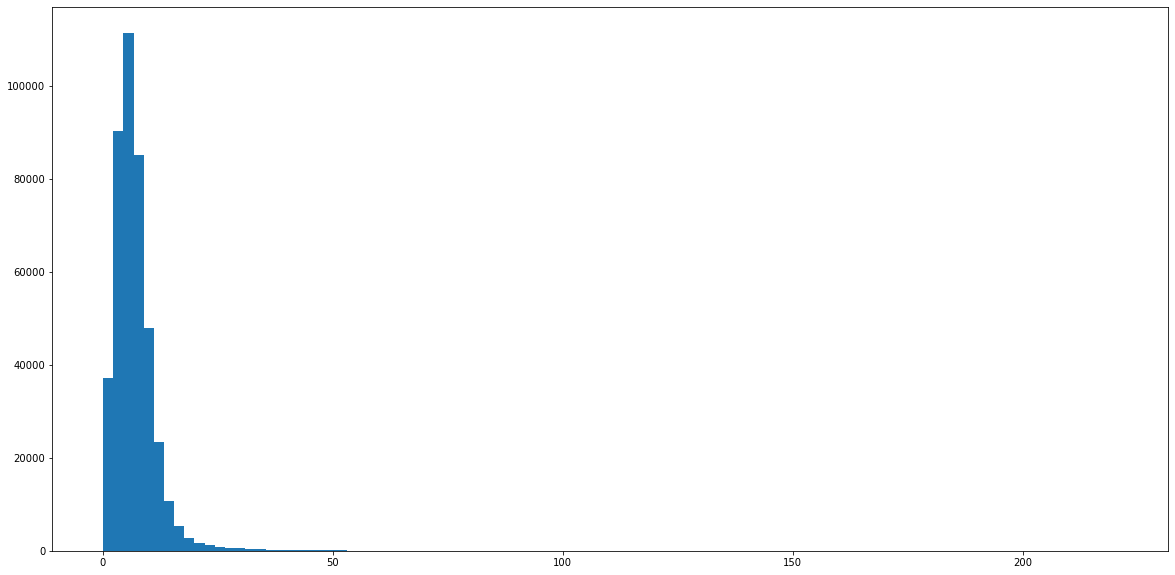

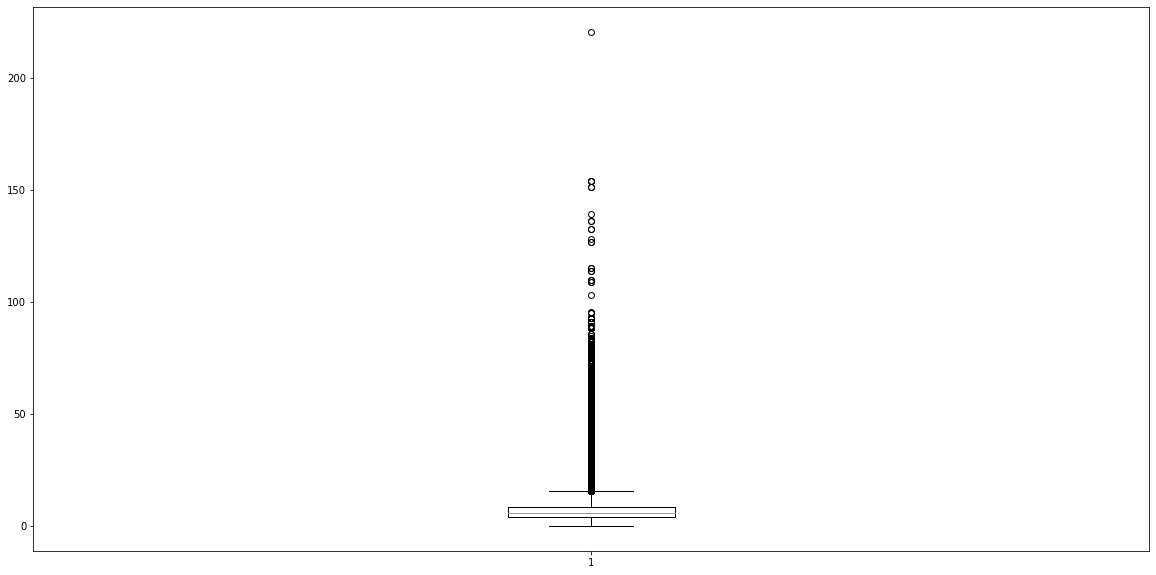

/tmp/ipykernel_1384/3011790675.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.array(durations), shade=True)


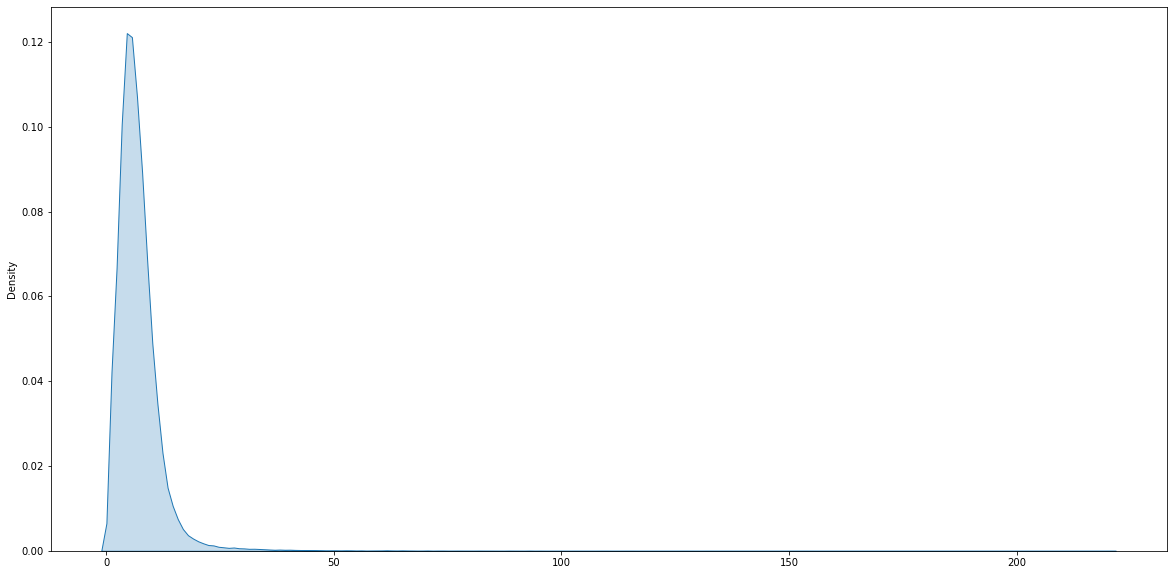

In [79]:
# plot histogram, density plot, boxplot, bell curve of durations

import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(20, 10))
plt.hist(durations, bins=100)

plt.show()

plt.figure(figsize=(20, 10))
plt.boxplot(durations)

plt.show()

import seaborn as sns

plt.figure(figsize=(20, 10))
sns.kdeplot(np.array(durations), shade=True)

plt.show()

In [80]:
# standard deviation of durations

np.std(durations)

5.017252849535532

In [183]:
import json
print(len(lines))

for i in lines:
    line_object = json.loads(i)
    if line_object['duration'] < 1 or line_object['duration'] > 30:
        lines.remove(i)
print(len(lines))

421668
412425


In [82]:
421480-412418

9062

In [36]:
"avg chars in transcript", sum([len(i) for i in texts])/len(texts)

('avg chars in transcript', 103.37208491212918)

In [37]:
"max chars in one transcript", max([len(i) for i in texts])

('max chars in one transcript', 1473)

In [38]:
"min chars in one transcript", min([len(i) for i in texts])

('min chars in one transcript', 1)

In [39]:
print("avg duration of audio", sum(durations)/len(durations))
print("max duration of audio", max(durations))
print("min duration of audio", min(durations))

avg duration of audio 6.95139615433188
max duration of audio 220.66
min duration of audio 0.3


In [41]:
sum(durations)/60/60

813.836635711781

In [166]:
lines.remove(lines[4])

In [167]:
len(lines)

412417

In [169]:
!pip install pandarallel

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16678 sha256=21738f9391b9fd7bc26067474f05c1ab9feef85c31d7157582a766215e926e7c
  Stored in directory: /home/ubuntu/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [186]:
import pandas as pd

In [187]:
list_series = pd.Series(lines)

In [205]:
def process_telugu_manifest(object):
    line_object = json.loads(object)
    line_object['text'] = ''.join([j for j in line_object['text'] if (ord(j) > 3072 and ord(j) < 3199) or (ord(j)==32 or ord(j)==8204) or (ord(j) > 48 and ord(j) < 58) ])
    new_line_object = json.dumps(line_object)
    return new_line_object
    

In [206]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

new_lines = list_series.parallel_apply(process_telugu_manifest)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [207]:
json.loads(lines[277201])["text"]

'2001 సెప్టెంబరు 11 అనంతర కాలంలో భద్రతా తనిఖీ కేంద్రాల వద్ద శోధనలు కూడా చాలా ఎక్కువ లోతుగా తయారయ్యాయి.'

In [208]:
json.loads(new_lines[277201])["text"]

'21 సెప్టెంబరు 11 అనంతర కాలంలో భద్రతా తనిఖీ కేంద్రాల వద్ద శోధనలు కూడా చాలా ఎక్కువ లోతుగా తయారయ్యాయి'

In [212]:
new_lines = list(new_lines)

In [213]:
# split te_manifest into train, dev and test sets

import random

random.shuffle(lines)

train_lines = lines[:int(0.80*len(lines))]
test_lines = lines[int(0.80*len(lines)):int(0.90*len(lines))]
dev_lines = lines[int(0.90*len(lines)):]


print(len(train_lines))
print(len(dev_lines))
print(len(test_lines))

with open('resources/final_te_manifests/train_manifest.json', 'w') as f:
    for i in train_lines:
        dict = json.loads(i)
        json.dump(dict, f)
        f.write('\n')

with open('resources/final_te_manifests/dev_manifest.json', 'w') as f:
    for i in dev_lines:
        dict = json.loads(i)
        json.dump(dict, f)
        f.write('\n')

with open('resources/final_te_manifests/test_manifest.json', 'w') as f:
    for i in test_lines:
        dict = json.loads(i)
        json.dump(dict, f)
        f.write('\n')



329940
41243
41242


In [172]:
from collections import defaultdict
from tqdm.auto import tqdm


def get_charset(manifest_data):
    charset = defaultdict(int)
    for row in tqdm(manifest_data, desc="Computing character set"):
        text = row['text']
        for character in text:
            charset[character] += 1
    return charset

In [173]:
from nemo.collections.asr.parts.utils.manifest_utils import read_manifest, write_manifest

train_manifest = read_manifest('resources/final_te_manifests/train_manifest.json')
dev_manifest = read_manifest('resources/final_te_manifests/dev_manifest.json')
test_manifest = read_manifest('resources/final_te_manifests/test_manifest.json')

train_charset = get_charset(train_manifest)
dev_charset = get_charset(dev_manifest)
test_charset = get_charset(test_manifest)

Computing character set:   0%|          | 0/337184 [00:00<?, ?it/s]

Computing character set:   0%|          | 0/42148 [00:00<?, ?it/s]

Computing character set:   0%|          | 0/42148 [00:00<?, ?it/s]

In [174]:
train_dev_set = set.union(set(train_charset.keys()), set(dev_charset.keys()))
test_set = set(test_charset.keys())

print(f"Number of tokens in train+dev set : {len(train_dev_set)}")
print(f"Number of tokens in test set : {len(test_set)}")

Number of tokens in train+dev set : 116
Number of tokens in test set : 102


In [175]:
train_test_common = set.intersection(train_dev_set, test_set)
test_oov = test_set - train_test_common
print(f"Number of OOV tokens in test set : {len(test_oov)}")
print()
print(test_oov)

Number of OOV tokens in test set : 0

set()


In [181]:
! python3 NeMo/scripts/tokenizers/process_asr_text_tokenizer.py --manifest=resources/final_te_manifests/train_manifest.json,resources/final_te_manifests/dev_manifest.json,resources/final_te_manifests/test_manifest.json \
    --data_root=resources/\
    --vocab_size=1024 \
    --tokenizer="spe" \
    --log\
    --spe_character_coverage=1.0

/home/ubuntu/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/ubuntu/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
INFO:root:Corpus already exists at path : resources/text_corpus/document.txt
[NeMo I 2024-01-30 10:17:32 sentencepiece_tokenizer:316] Processing resources/text_corpus/document.txt and store at resources/tokenizer_spe_bpe_v1024
sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=resources/text_corpus/document.txt --model_prefix=resources/tokenizer_spe_bpe_v1024/tokenizer --vocab_size=1024 --shuffle_input_sentence=true --hard_vocab_limit=false --model_type=bpe --character_coverage=1.0 --bos_id=-1 --eos_id=-1 --normalization_rule_name=nmt_nfkc_cf
sentencepiece_train

# Configuring the model

In [1]:
import nemo.collections.asr as nemo_asr

model = nemo_asr.models.ASRModel.from_pretrained("nvidia/stt_en_fastconformer_ctc_large")

[NeMo W 2024-02-09 18:24:34 nemo_logging:393] /home/ubuntu/miniconda3/envs/asr_venv/lib/python3.11/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
      torch.utils._pytree._register_pytree_node(
    


[NeMo I 2024-02-09 18:24:41 nemo_logging:381] Tokenizer SentencePieceTokenizer initialized with 1024 tokens


[NeMo W 2024-02-09 18:24:41 nemo_logging:393] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: null
    sample_rate: 16000
    batch_size: 1
    shuffle: true
    num_workers: 8
    pin_memory: true
    use_start_end_token: false
    trim_silence: false
    max_duration: 20
    min_duration: 0.1
    is_tarred: false
    tarred_audio_filepaths: null
    shuffle_n: 2048
    bucketing_strategy: fully_randomized
    bucketing_batch_size: null
    
[NeMo W 2024-02-09 18:24:41 nemo_logging:393] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath: null
    sample_rate: 16000
    batch_size: 32
    shuffle: false
    num_workers: 8

[NeMo I 2024-02-09 18:24:41 nemo_logging:381] PADDING: 0
[NeMo I 2024-02-09 18:24:42 nemo_logging:381] Numba CUDA SpecAugment kernel is being used


[NeMo W 2024-02-09 18:24:42 nemo_logging:393] `method_cfg` is deprecated and will be removed in the future. Please use `measure_cfg` instead.
[NeMo W 2024-02-09 18:24:42 nemo_logging:393] Re-writing `measure_cfg` with the value of `method_cfg`.
[NeMo W 2024-02-09 18:24:42 nemo_logging:393] `temperature` is deprecated and will be removed in the future. Please use `alpha` instead.
[NeMo W 2024-02-09 18:24:42 nemo_logging:393] Re-writing `alpha` with the value of `temperature`.
[NeMo W 2024-02-09 18:24:42 nemo_logging:393] `method_cfg` is deprecated and will be removed in the future. Please use `measure_cfg` instead.
[NeMo W 2024-02-09 18:24:42 nemo_logging:393] Re-writing `measure_cfg` with the value of `method_cfg`.
[NeMo W 2024-02-09 18:24:42 nemo_logging:393] `temperature` is deprecated and will be removed in the future. Please use `alpha` instead.
[NeMo W 2024-02-09 18:24:42 nemo_logging:393] Re-writing `alpha` with the value of `temperature`.


[NeMo I 2024-02-09 18:24:43 nemo_logging:381] Model EncDecCTCModelBPE was successfully restored from /home/ubuntu/.cache/huggingface/hub/models--nvidia--stt_en_fastconformer_ctc_large/snapshots/42b3eb6bd6f86465f0691f9ea33ddf8f4c5d1c10/stt_en_fastconformer_ctc_large.nemo.


In [2]:
help(model.change_vocabulary)

Help on method change_vocabulary in module nemo.collections.asr.models.ctc_bpe_models:

change_vocabulary(new_tokenizer_dir: Union[str, omegaconf.dictconfig.DictConfig], new_tokenizer_type: str, decoding_cfg: Optional[omegaconf.dictconfig.DictConfig] = None) method of nemo.collections.asr.models.ctc_bpe_models.EncDecCTCModelBPE instance
    Changes vocabulary of the tokenizer used during CTC decoding process.
    Use this method when fine-tuning on from pre-trained model.
    This method changes only decoder and leaves encoder and pre-processing modules unchanged. For example, you would
    use it if you want to use pretrained encoder when fine-tuning on a data in another language, or when you'd need
    model to learn capitalization, punctuation and/or special characters.
    
    Args:
        new_tokenizer_dir: Directory path to tokenizer or a config for a new tokenizer (if the tokenizer type is `agg`)
        new_tokenizer_type: Either `agg`, `bpe` or `wpe`. `bpe` is used for Sente

In [3]:
model.change_vocabulary(new_tokenizer_dir='resources/tokenizer_spe_bpe_v1024', new_tokenizer_type='bpe')

[NeMo W 2024-02-02 12:48:33 modelPT:251] You tried to register an artifact under config key=tokenizer.model_path but an artifact for it has already been registered.
[NeMo W 2024-02-02 12:48:33 modelPT:251] You tried to register an artifact under config key=tokenizer.vocab_path but an artifact for it has already been registered.
[NeMo W 2024-02-02 12:48:33 modelPT:251] You tried to register an artifact under config key=tokenizer.spe_tokenizer_vocab but an artifact for it has already been registered.


[NeMo I 2024-02-02 12:48:33 mixins:170] Tokenizer SentencePieceTokenizer initialized with 1024 tokens
[NeMo I 2024-02-02 12:48:34 ctc_bpe_models:237] 
    Replacing old number of classes (1024) with new number of classes - 1024


[NeMo W 2024-02-02 12:48:34 asr_confidence_utils:195] `method_cfg` is deprecated and will be removed in the future. Please use `measure_cfg` instead.
[NeMo W 2024-02-02 12:48:34 asr_confidence_utils:200] Re-writing `measure_cfg` with the value of `method_cfg`.
[NeMo W 2024-02-02 12:48:34 asr_confidence_utils:95] `temperature` is deprecated and will be removed in the future. Please use `alpha` instead.
[NeMo W 2024-02-02 12:48:34 asr_confidence_utils:100] Re-writing `alpha` with the value of `temperature`.


[NeMo I 2024-02-02 12:48:34 ctc_bpe_models:279] Changed tokenizer to ['<unk>', 'ని', '▁ప', '▁మ', '్ర', 'న్', 'ర్', '▁క', 'స్', '▁వ', '▁అ', 'ార', 'ాల', 'ిం', '▁స', '▁చ', 'ది', 'లో', 'క్', 'ను', 'లు', 'రి', 'గా', '్య', 'కు', '▁ఉ', '▁త', '▁ప్ర', 'ట్', 'ించ', 'ండ', '▁ద', 'ారు', 'న్న', 'కి', 'ంట', 'తు', '▁ఇ', 'యు', '▁ఆ', 'ల్', 'ంది', '▁ల', 'యి', 'ాని', '▁ర', '▁చే', 'రు', '▁గ', '▁బ', 'టి', '▁మరి', '▁న', 'ంగా', '▁మరియు', 'ప్', '▁జ', 'ంద', 'డు', 'త్', '▁స్', 'లి', 'ంత', '▁వి', '▁ఎ', 'తి', 'ిన', 'ాయి', 'ార్', 'ానికి', '▁ని', 'ైన', '▁ఒ', 'పు', 'న్ని', 'చ్', 'వి', 'డి', 'ంలో', 'యా', 'డ్', 'ాలు', 'గ్', '▁ఒక', 'ద్', 'చు', 'లా', '▁ను', '▁సం', 'ాత', 'క్క', 'దా', '▁లే', '▁భ', '▁ఈ', '▁లో', 'ాన', 'ింది', 'స్తు', '▁ఉన్న', '్యా', 'డానికి', '▁ట', 'స్త', '▁మీ', 'నే', 'ిక', 'డం', '▁కొ', 'సు', '▁య', '▁సమ', 'దు', 'మైన', 'వు', 'ష్', '▁ఫ', 'లను', '▁చేయ', '▁ఉంట', 'ేశ', '▁హ', 'ప్ప', 'ండి', 'ొక్క', 'ాలా', '▁శ', '▁1', 'ంచ', 'తో', 'క్ష', '▁ఏ', '▁చాలా', 'గి', '్వ', '▁యొక్క', 'సి', 'కో', 'టు', '▁లేదా', '్రా', '▁సా', 'క

In [2]:
import os
import glob
import subprocess
import tarfile
import wget
import copy
from omegaconf import OmegaConf, open_dict

In [3]:
import copy
cfg = copy.deepcopy(model.cfg)

In [4]:
len(cfg.decoder.vocabulary)

1024

In [5]:
model.cfg.optim.lr = 0.0005


In [10]:
model.cfg.optim.sched.min_lr = 0.00003

In [11]:
with open_dict(cfg):
    cfg.train_ds.manifest_filepath = 'resources/final_te_manifests/train_manifest.json'
    cfg.test_ds.manifest_filepath = 'resources/final_te_manifests/test_manifest.json'
    cfg.validation_ds.manifest_filepath = 'resources/final_te_manifests/dev_manifest.json'
    cfg.optim.lr = 0.0005
    cfg.optim.sched.min_lr = 0.000001
    cfg.batch_size=19
    cfg.train_ds.batch_size=19
    cfg.test_ds.batch_size=19
    cfg.validation_ds.batch_size=19
    

In [ ]:
model.setup_training_data(cfg.train_ds)
model.setup_multiple_validation_data(cfg.validation_ds)
model.setup_multiple_test_data(cfg.test_ds)

In [12]:
model.cfg = cfg

In [14]:
model.cfg.optim

{'name': 'adamw', 'lr': 0.0005, 'betas': [0.9, 0.98], 'weight_decay': 0.001, 'sched': {'name': 'CosineAnnealing', 'warmup_steps': 15000, 'warmup_ratio': None, 'min_lr': 1e-06}}

In [144]:
# open a yaml file via omegaconf

fast_conformer_config = OmegaConf.load('models/fast-conformer_ctc_bpe.yaml')

fast_conformer_config.model = cfg
fast_conformer_config

{'name': 'FastConformer-CTC-BPE', 'model': {'sample_rate': 16000, 'log_prediction': True, 'ctc_reduction': 'mean_volume', 'skip_nan_grad': False, 'train_ds': {'manifest_filepath': 'resources/final_te_manifests/train_manifest.json', 'sample_rate': 16000, 'batch_size': 19, 'shuffle': True, 'num_workers': 8, 'pin_memory': True, 'use_start_end_token': False, 'trim_silence': False, 'max_duration': 20, 'min_duration': 0.1, 'is_tarred': False, 'tarred_audio_filepaths': None, 'shuffle_n': 2048, 'bucketing_strategy': 'fully_randomized', 'bucketing_batch_size': None}, 'validation_ds': {'manifest_filepath': 'resources/final_te_manifests/dev_manifest.json', 'sample_rate': 16000, 'batch_size': 19, 'shuffle': False, 'num_workers': 8, 'pin_memory': True, 'use_start_end_token': False, 'max_duration': 20}, 'test_ds': {'manifest_filepath': 'resources/final_te_manifests/test_manifest.json', 'sample_rate': 16000, 'batch_size': 19, 'shuffle': False, 'num_workers': 8, 'pin_memory': True, 'use_start_end_toke

In [145]:
OmegaConf.save(fast_conformer_config, 'models/fast-conformer_ctc_bpe.yaml')

In [10]:
import torch
import pytorch_lightning as ptl

# if torch.cuda.is_available():
#   accelerator = 'gpu'
# else:
#   accelerator = 'cpu'

EPOCHS = 8 

trainer = ptl.Trainer(devices=1,
                      accelerator='gpu',
                      max_epochs=EPOCHS,
                      enable_checkpointing=True,
                      logger=True,
                      log_every_n_steps=100,
                      check_val_every_n_epoch=1,
                    #   strategy = 'ddp_notebook' 
                      )


# Setup model with the trainer
model.set_trainer(trainer)

# Finally, update the model's internal config
model.cfg = model._cfg

[NeMo W 2024-01-30 16:22:35 nemo_logging:349] /home/ubuntu/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
      warnings.warn(
    
[NeMo W 2024-01-30 16:22:35 nemo_logging:349] /home/ubuntu/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
      warnings.warn(
    
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [12]:
import torch
torch.set_float32_matmul_precision('medium')
torch.cuda.is_available()

True

In [34]:
import json
print(model._cfg)

{'sample_rate': 16000, 'log_prediction': True, 'ctc_reduction': 'mean_volume', 'skip_nan_grad': False, 'train_ds': {'manifest_filepath': 'resources/final_te_manifests/train_manifest.json', 'sample_rate': 16000, 'batch_size': 19, 'shuffle': True, 'num_workers': 8, 'pin_memory': True, 'use_start_end_token': False, 'trim_silence': False, 'max_duration': 20, 'min_duration': 0.1, 'is_tarred': False, 'tarred_audio_filepaths': None, 'shuffle_n': 2048, 'bucketing_strategy': 'fully_randomized', 'bucketing_batch_size': None}, 'validation_ds': {'manifest_filepath': 'resources/final_te_manifests/dev_manifest.json', 'sample_rate': 16000, 'batch_size': 19, 'shuffle': False, 'num_workers': 8, 'pin_memory': True, 'use_start_end_token': False, 'max_duration': 20}, 'test_ds': {'manifest_filepath': 'resources/final_te_manifests/test_manifest.json', 'sample_rate': 16000, 'batch_size': 19, 'shuffle': False, 'num_workers': 8, 'pin_memory': True, 'use_start_end_token': False}, 'tokenizer': {'dir': 'resources

In [30]:
import librosa
import IPython.display as ipd

ipd.Audio(te_ai4bharat["file_name"][6])

In [ ]:
model.transcribe()

In [ ]:
model.transcribe(['resources/newsonair_v5/telugu/Regional-Vijayawada-Telugu-1320-20201128145719/sent_53.wav'])